In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from python_analysis import *
import matplotlib.animation as animation
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [64]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [277]:
names = []

# we need informations to find the files:

# amplitudes vetor, contains the amplitudes of the file we want to analyze
amplitude_vector = [
    "1.000000"];

# time
range_time = 40
number_steps= 500
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step,len_step)

epsilon = ["0.000000"]
dx = "0.050000"


model = "hyperboloidal_wave_equation"
data = [3]
for i in data:
    for e in range(len(epsilon)):
        for a in range(len(amplitude_vector)):
            names.append("./data/"+model+"/data"+str(i)+"/ampl_"+amplitude_vector[a]+"_eps"+epsilon[e]+"_dx_"+dx+"steps"+str(number_steps)+"last_time"+str(format(range_time, '.6f'))+".csv") 
len(names)


1

In [246]:
print(names[0])

./data/hyperboloidal_wave_equation/data3/ampl_1.000000_eps0.000000_dx_0.050000steps500last_time20.000000.csv


In [247]:
big_DF = []

In [278]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 5
gl = 2
gr = 2
N_point1 = int(domain_lenght/h1+1)+gl+gr
N_point2 = int(domain_lenght/h2+1)+gl+gr
N_point3 = int(domain_lenght/h3+1)+gl+gr
print(N_point1,N_point2,N_point3)
#big_DF = []
for n in range (0, len(names[:])):
    DF1, DF2, DF3 = [], [], []
    for i in range (0,number_steps):
        DF1.append( pd.read_csv(names[n],skiprows = (N_point1+1)*i,nrows =N_point1) )
        DF2.append( pd.read_csv(names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*i,nrows =N_point2) )
        DF3.append( pd.read_csv(names[n],skiprows = (N_point1+1)*(number_steps+1)+ (N_point2+1)*(number_steps+1)+(N_point3+1)*i,nrows =N_point3) )
    big_DF.append([DF1,DF2,DF3])
    print("run:"+str(n)+" ->"+names[n]+ " added")
print("number of runs:",len(big_DF))

105 205 405
run:0 ->./data/hyperboloidal_wave_equation/data3/ampl_1.000000_eps0.000000_dx_0.050000steps500last_time40.000000.csv added
number of runs: 6
CPU times: user 37.8 s, sys: 1.39 s, total: 39.2 s
Wall time: 39.2 s


In [280]:
# big_Df index:
# big_DF[run][dx][time]
big_DF[5][0][0]

,x,field0,field1,field2
0,-0.10,0,0.000000,0.000000
1,-0.05,0,0.000000,0.000000
2,0.00,0,0.000000,1.000000
3,0.05,0,-0.050067,0.998749
4,0.10,0,-0.100524,0.994984
...,...,...,...,...
100,4.90,0,0.000000,0.000000
101,4.95,0,0.000000,0.000000
102,5.00,0,0.000000,0.000000
103,5.05,0,0.000000,0.000000


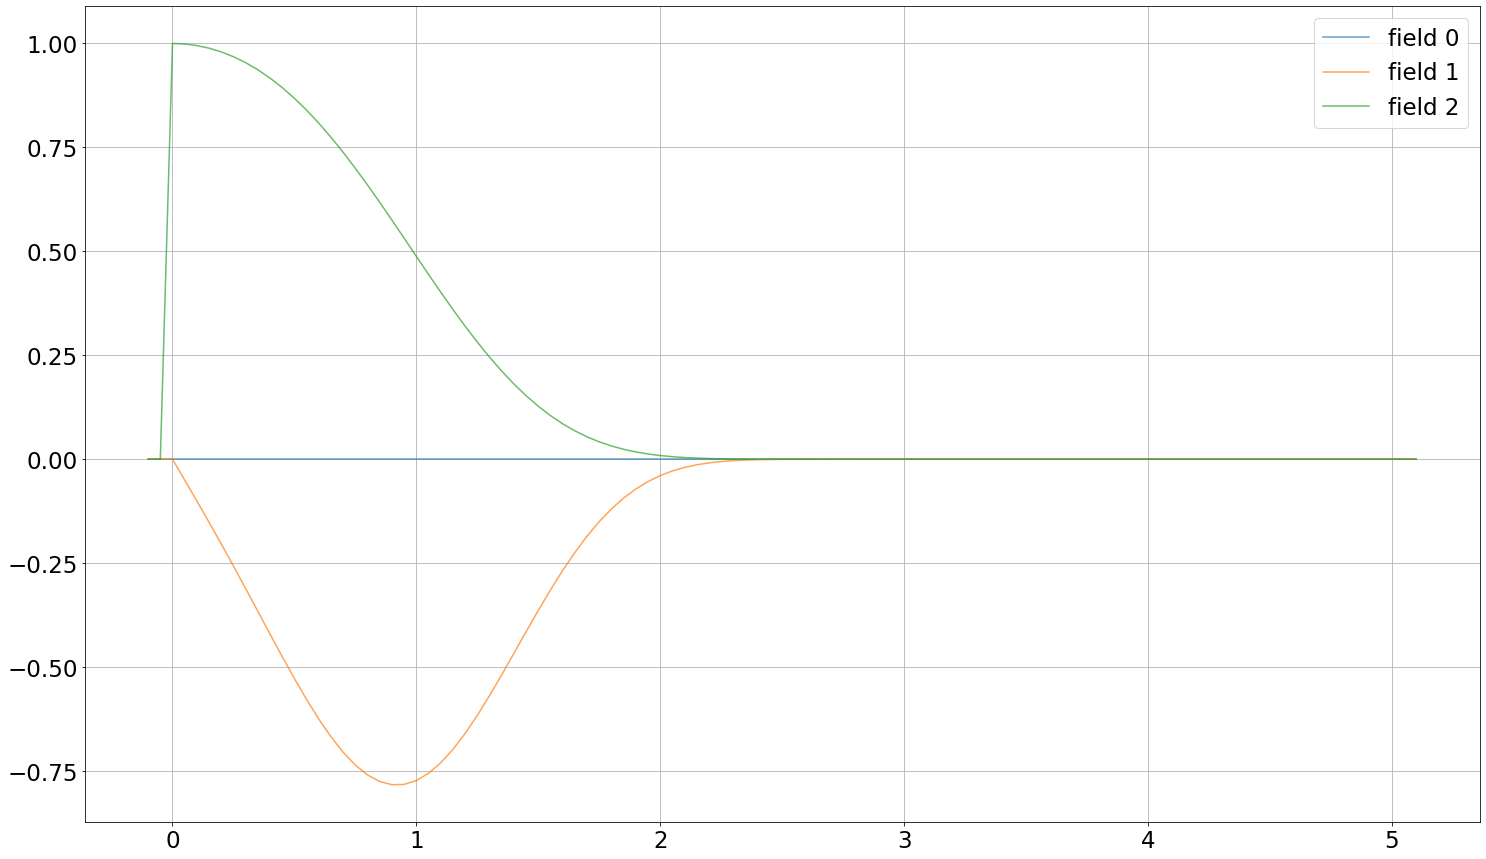

In [173]:
for n in range(0,1):
    for i in range(0,1):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],alpha=0.7,markersize=25,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],alpha=0.7,markersize=25,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],alpha=0.7,markersize=10,label="field 2")


plt.legend()
plt.grid()
#plt.xlim([0.98, 1])
#plt.ylim([-0.000000001, 0.000000002])

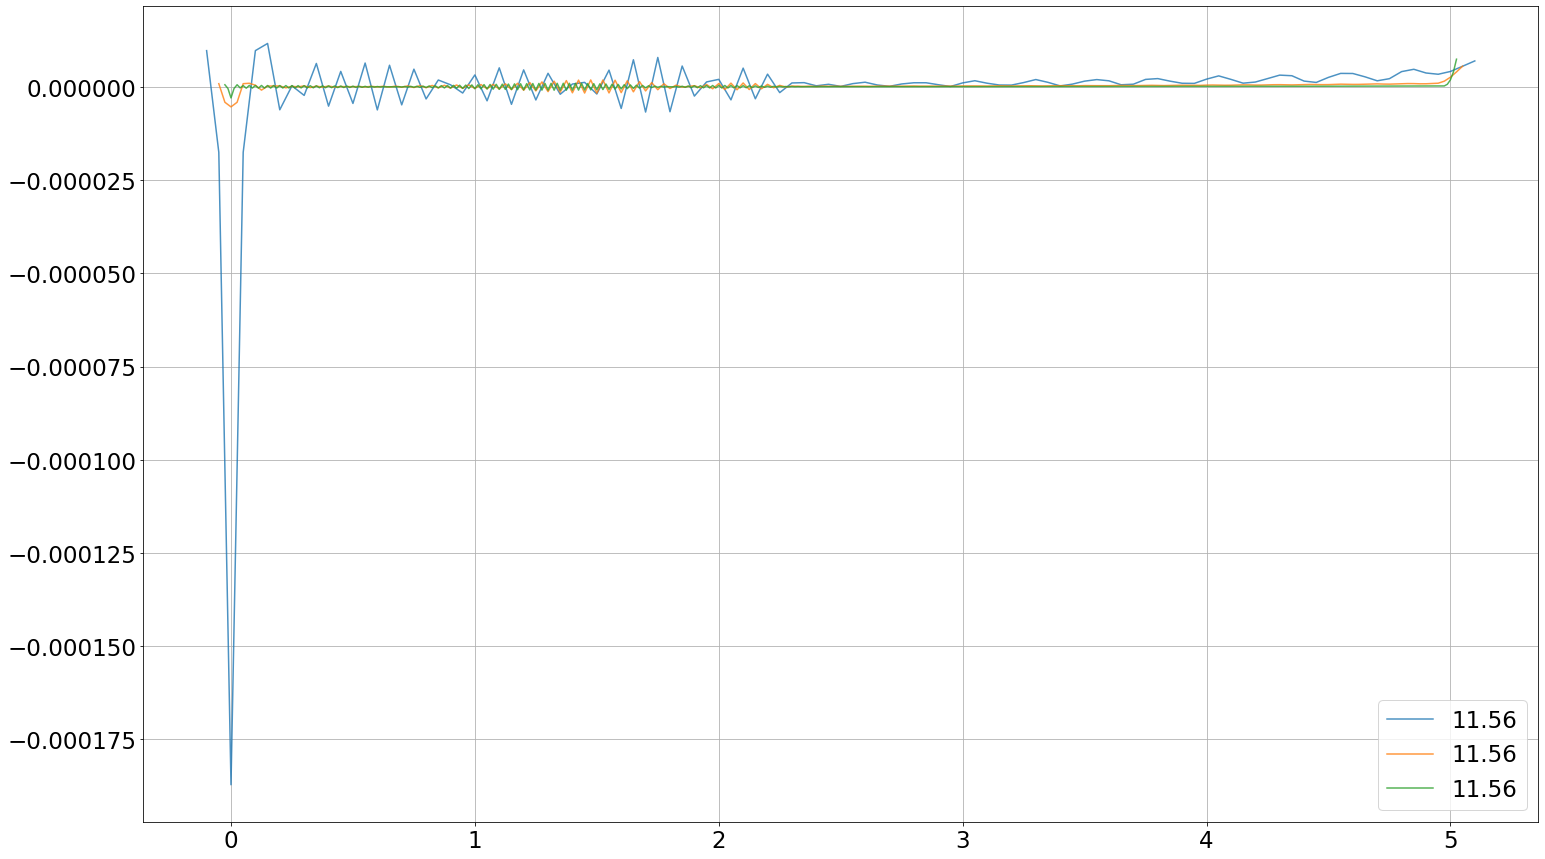

In [262]:
for n in [1]:
    for i in range(0,3):        
        for j in range(289,290):
            #plt.plot(X[j],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label="time:"+str(times[j])+"e:"+amplitude_vector[n])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.8,markersize=8,label="2")
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0']/Chi[i],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1']/Chi[i],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2']/Chi[i],alpha=0.8,markersize=8,label="2")
            #plt.plot(big_DF[n][i][j]['x'],model1_gaussian_solution(big_DF[n][i][j]['x'],times[j],-float(amplitude_vector[n])),'+',alpha=0.4,label="teo,time:"+str(times[j]))

            

            
plt.grid()
#plt.xlim([-0.1,0.2])
#plt.ylim([ -0.000001,0.000001] )
#plt.yscale('log')
plt.legend()
#times[163]

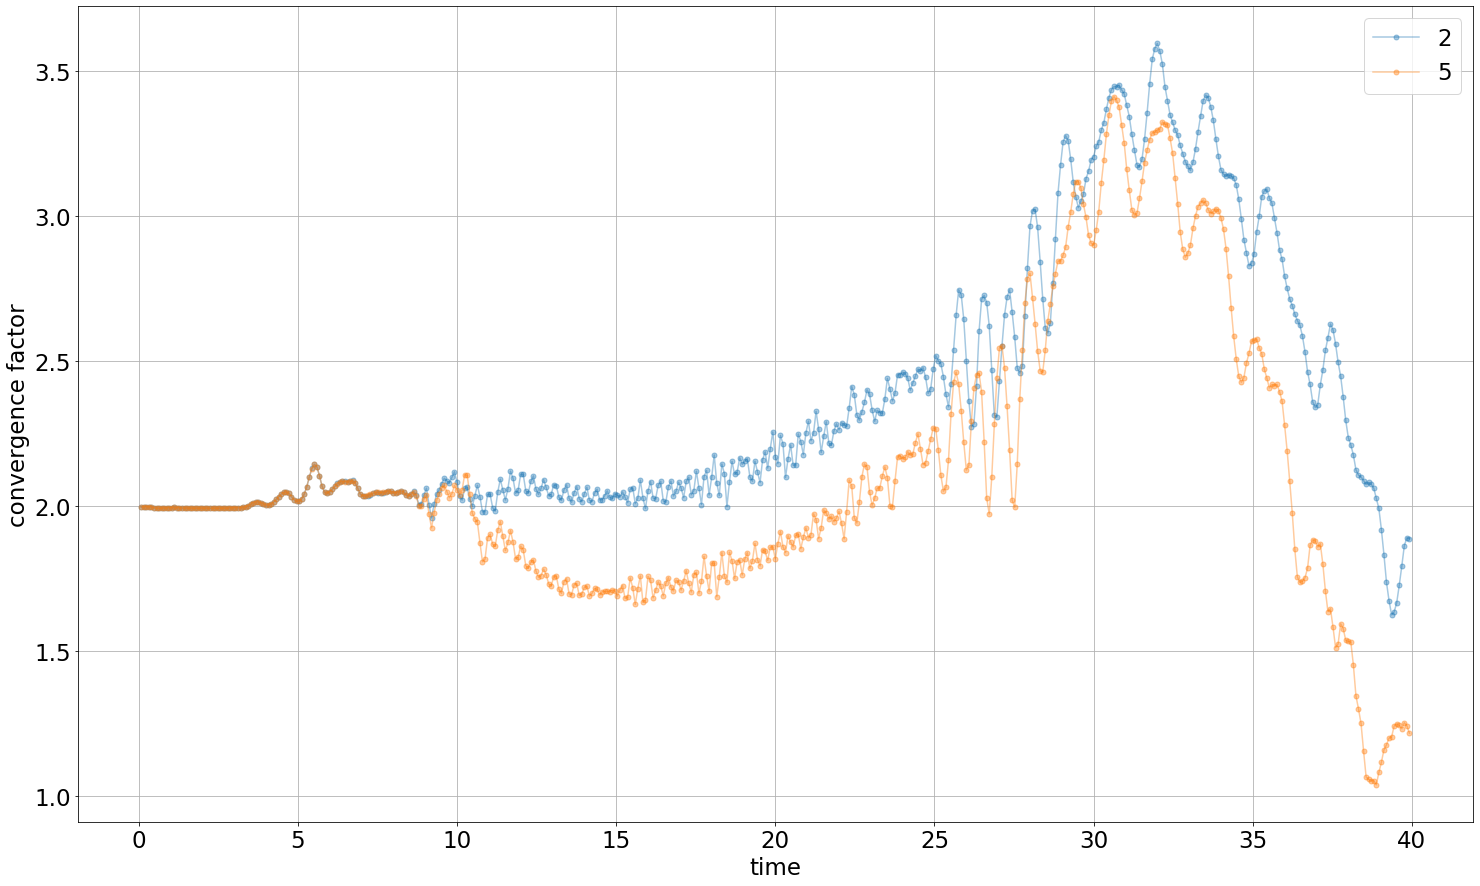

In [282]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
"""
for i,t in enumerate(times[::2]):
        self_conv_test_vect.append(self_conv_test(big_DF[0][0][i],big_DF[0][1][i],big_DF[0][2][i]))
        allruns_self_conv_test_vect.append(self_conv_test_vect)
#plt.plot(times[::2], self_conv_test_vect,markersize=10,alpha=0.5,label=label_vector[0])
"""
for n in [2,5]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,"field0") )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=10,alpha=0.4,label=n)
#plt.xlim(0,10)
#plt.ylim(1.9,2.1)
#plt.xlabel('time')
plt.ylabel('convergence factor')
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

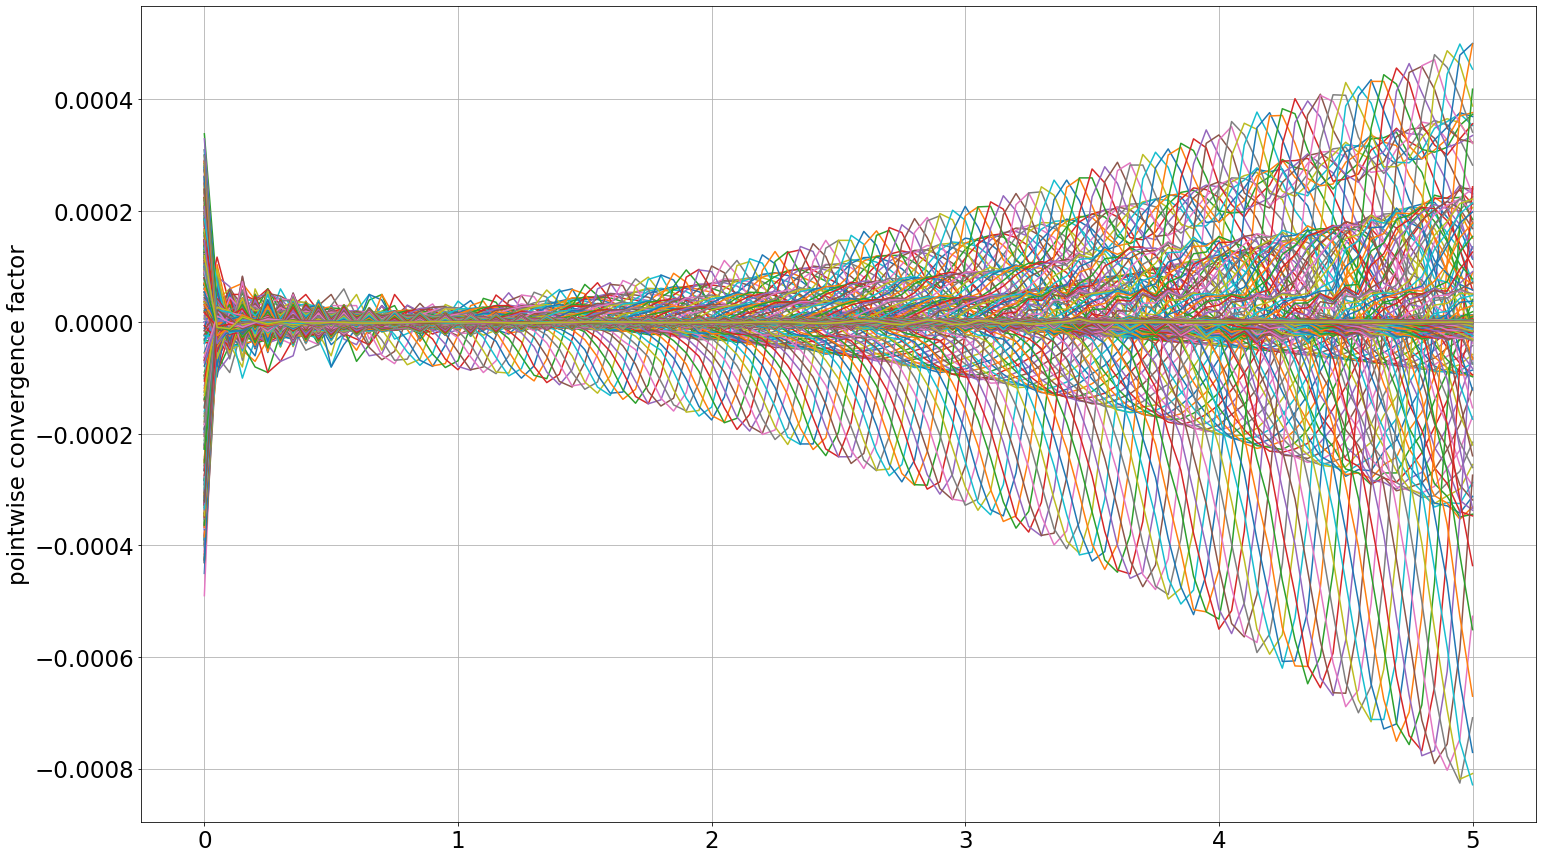

In [255]:
n_ind = 0
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,"field0"))
    plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
plt.ylabel('pointwise convergence factor')
plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

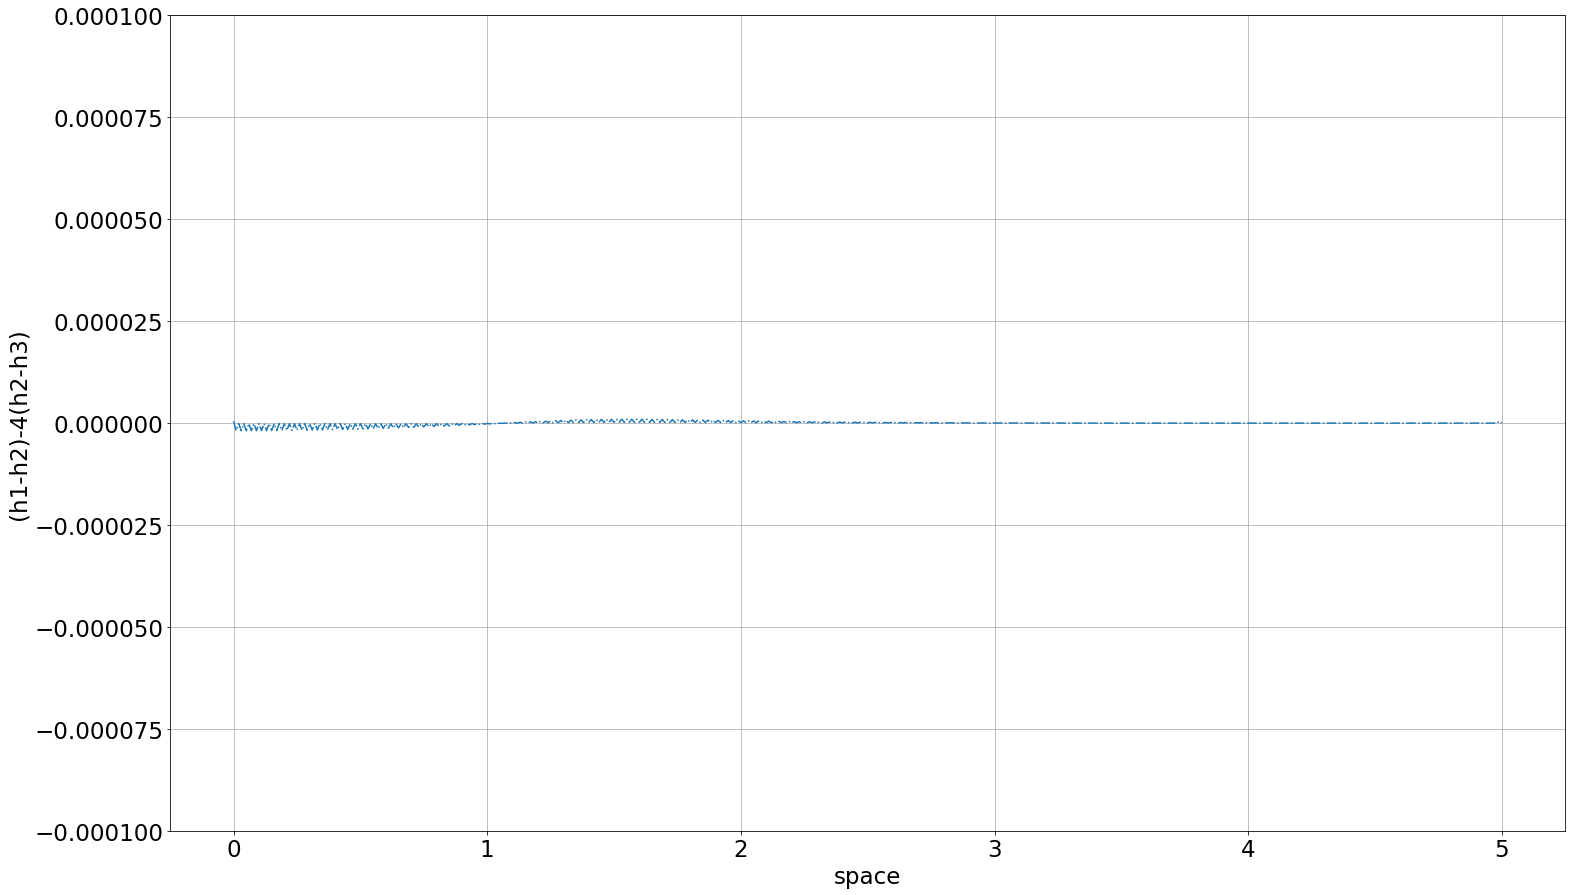

In [309]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0]-self_conv_test_vect_pw[1][1],'-.')
#line2, = ax.plot(DF[0][1]['x'], self_conv_test_vect_pw[1][1],'.')
plt.grid()
plt.ylim(-0.0001,0.0001)
plt.xlabel('space')
plt.ylabel('(h1-h2)-4(h2-h3)')

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0]-self_conv_test_vect_pw[i][1])  # update the data.
    return line1,

#def animate2(i):
#    line2.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
#    return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save("pw_conv.mp4")



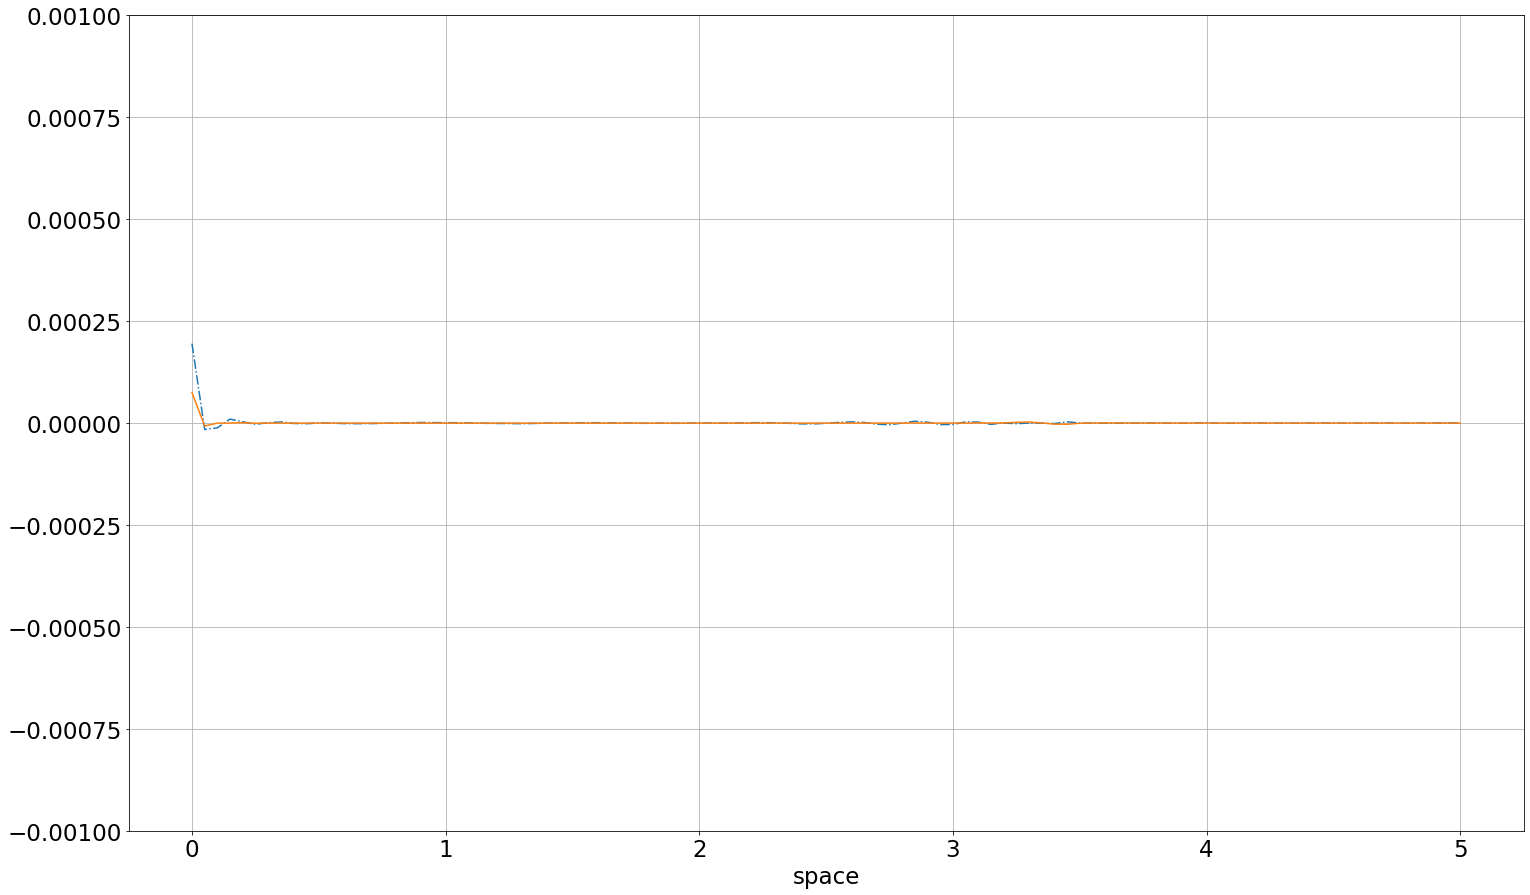

In [132]:
fig, ax = plt.subplots()

line1, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][0],'-.')
line2, = ax.plot(big_DF[n_ind][0][1]['x'][gl:-gr], self_conv_test_vect_pw[1][1])
plt.grid()
plt.ylim(-0.001,0.001)
plt.xlabel('space')
#plt.ylabel('(h1-h2)-4(h2-h3)')
data_name = "./data/"+model+"/data"+str(data[0])+"/epsilon"+str(epsilon[n_ind])+"_pointwise_convergence.mp4"

def animate1(i):
    line1.set_ydata(self_conv_test_vect_pw[i][0])  # update the data.
    line2.set_ydata(self_conv_test_vect_pw[i][1])
    return line1,line2

#def animate2(i):
 #   line2.set_ydata(self_conv_test_vect_pw[i][1])  # update the data.
  #  return line2,


ani = animation.FuncAnimation(
    fig, animate1, interval=80, blit=True, frames=number_steps-1)
ani.save(data_name)



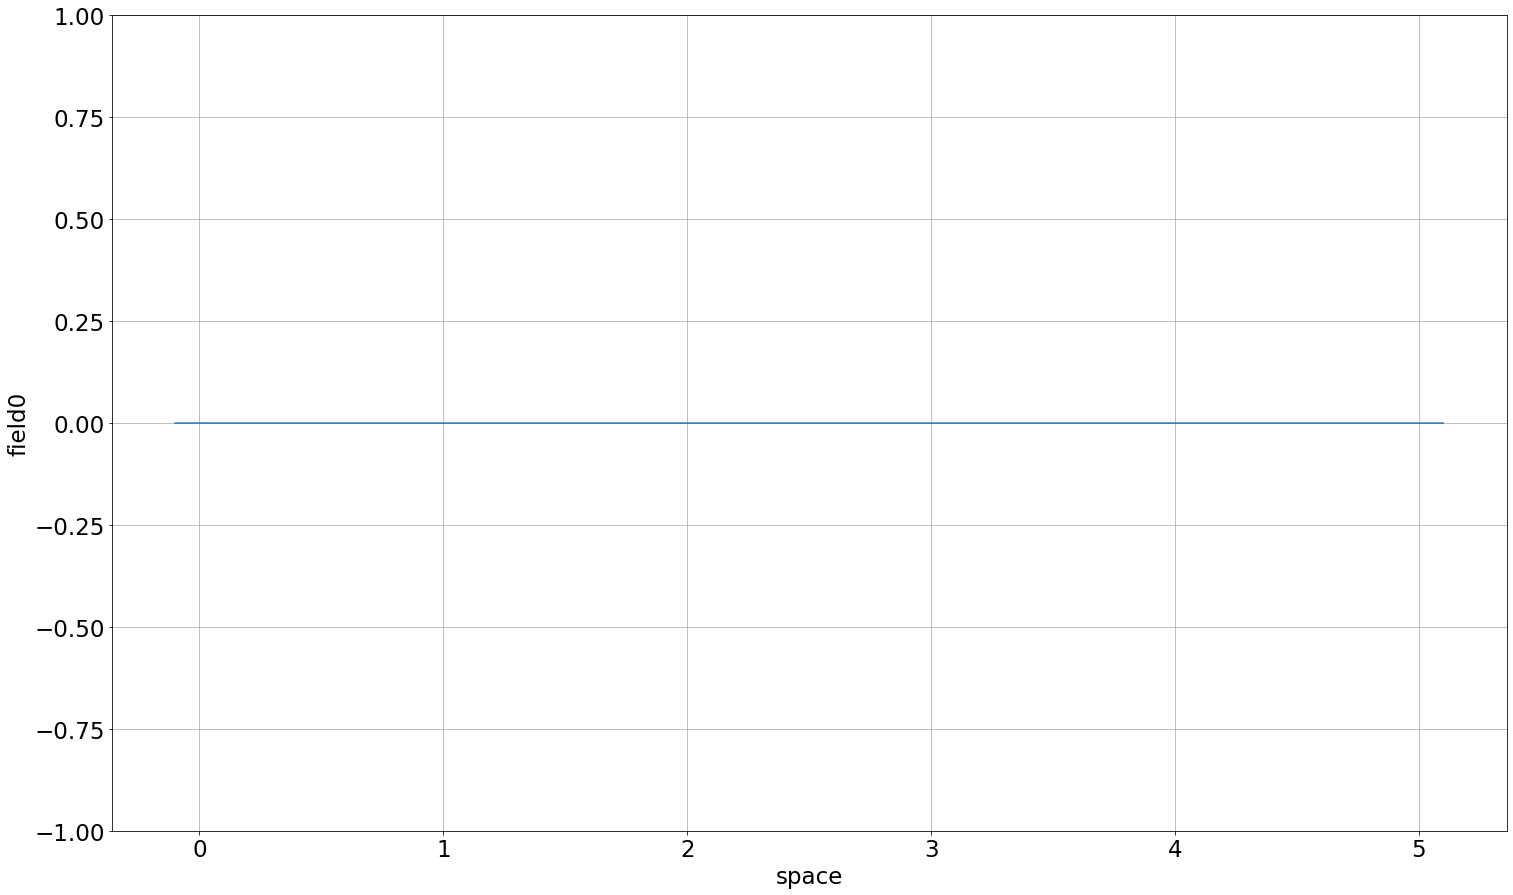

In [177]:
fig, ax = plt.subplots()
field = 0
h_ind = 0
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(data[0])+"/field"+str(field)+".mp4"
line, = ax.plot(big_DF[big_DF_ind][h_ind][0]['x'], big_DF[big_DF_ind][h_ind][0]['field'+str(field)]/Chi[h_ind])
plt.ylim(-1,1)
plt.xlabel('space')
plt.ylabel('field'+str(field))
#plt.xlim(-5,0)
plt.grid()

def animate(i):
    #line.set_xdata(DF[0][i]['x'])
    line.set_ydata(big_DF[big_DF_ind][h_ind][i]['field'+str(field)]/Chi[h_ind])  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, interval=50, blit=True, save_count=number_steps-1)
ani.save(data_name)



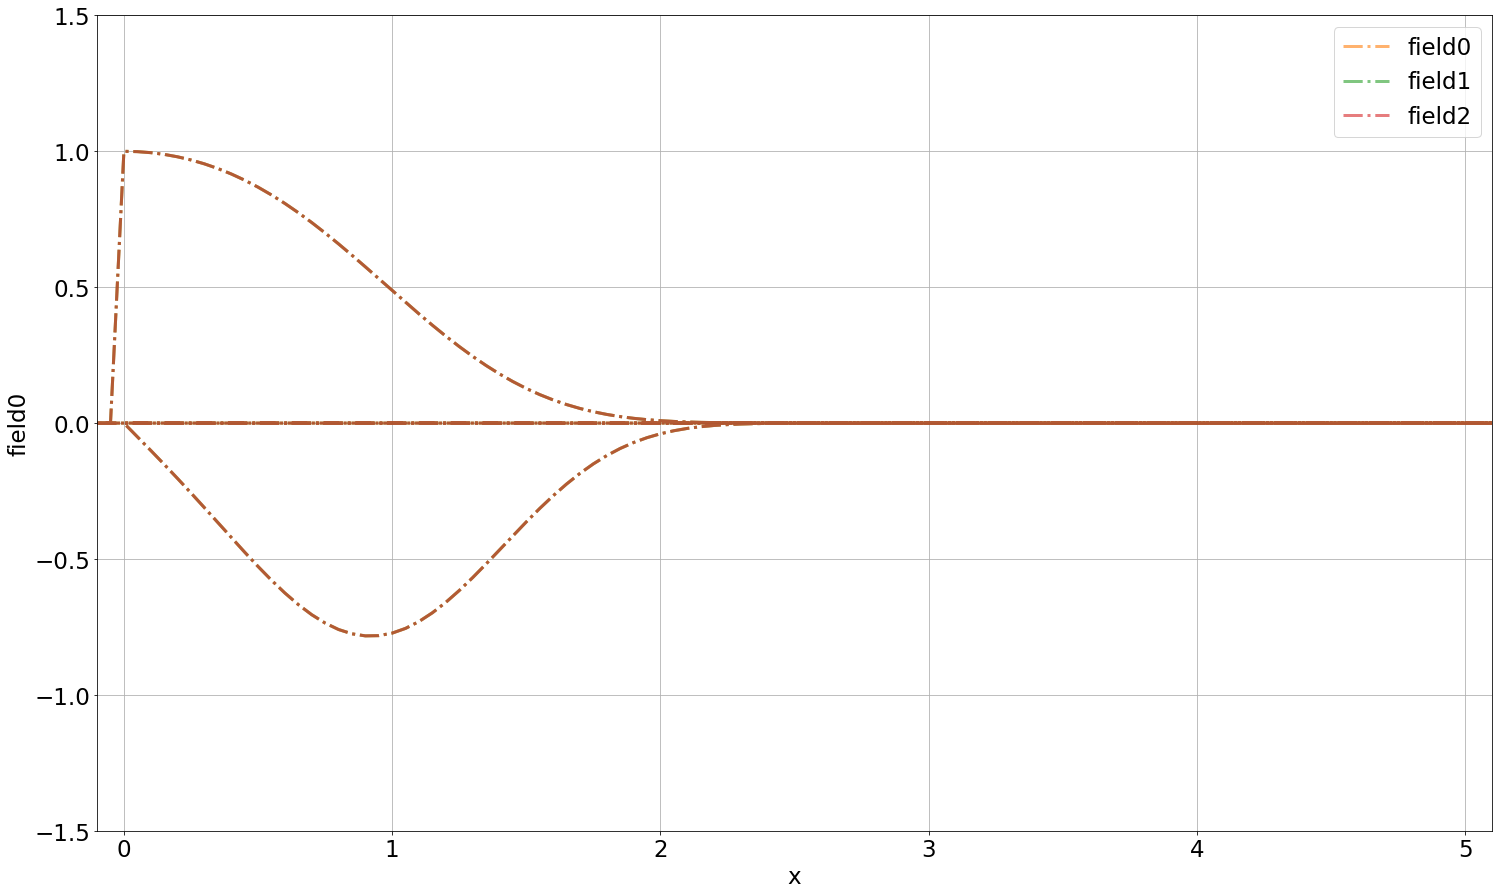

In [134]:
fields_to_print = ["field0","field1","field2"]
h_ind = 0
big_DF_ind = 0
data_name = "./data/"+model+"/data"+str(data[0])+"/fields.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-1.5,1.5),xlim=(-float(dx)*gl,domain_lenght+float(dx)*gr))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print):
    lobj = ax1.plot([],[],'-.',lw=3,alpha=0.6,label=index)[0]
    lines.append(lobj)

x = []
y = []
for i in (fields_to_print):
    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([ big_DF[0][h_ind][0][i]])


def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print):
        x[n] = big_DF[big_DF_ind][h_ind][0]['x']
        y[n] = big_DF[big_DF_ind][h_ind][i][j]
        
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(number_steps-1), interval=75, blit=True)
plt.legend()
plt.grid()
plt.show()
anim.save(data_name)

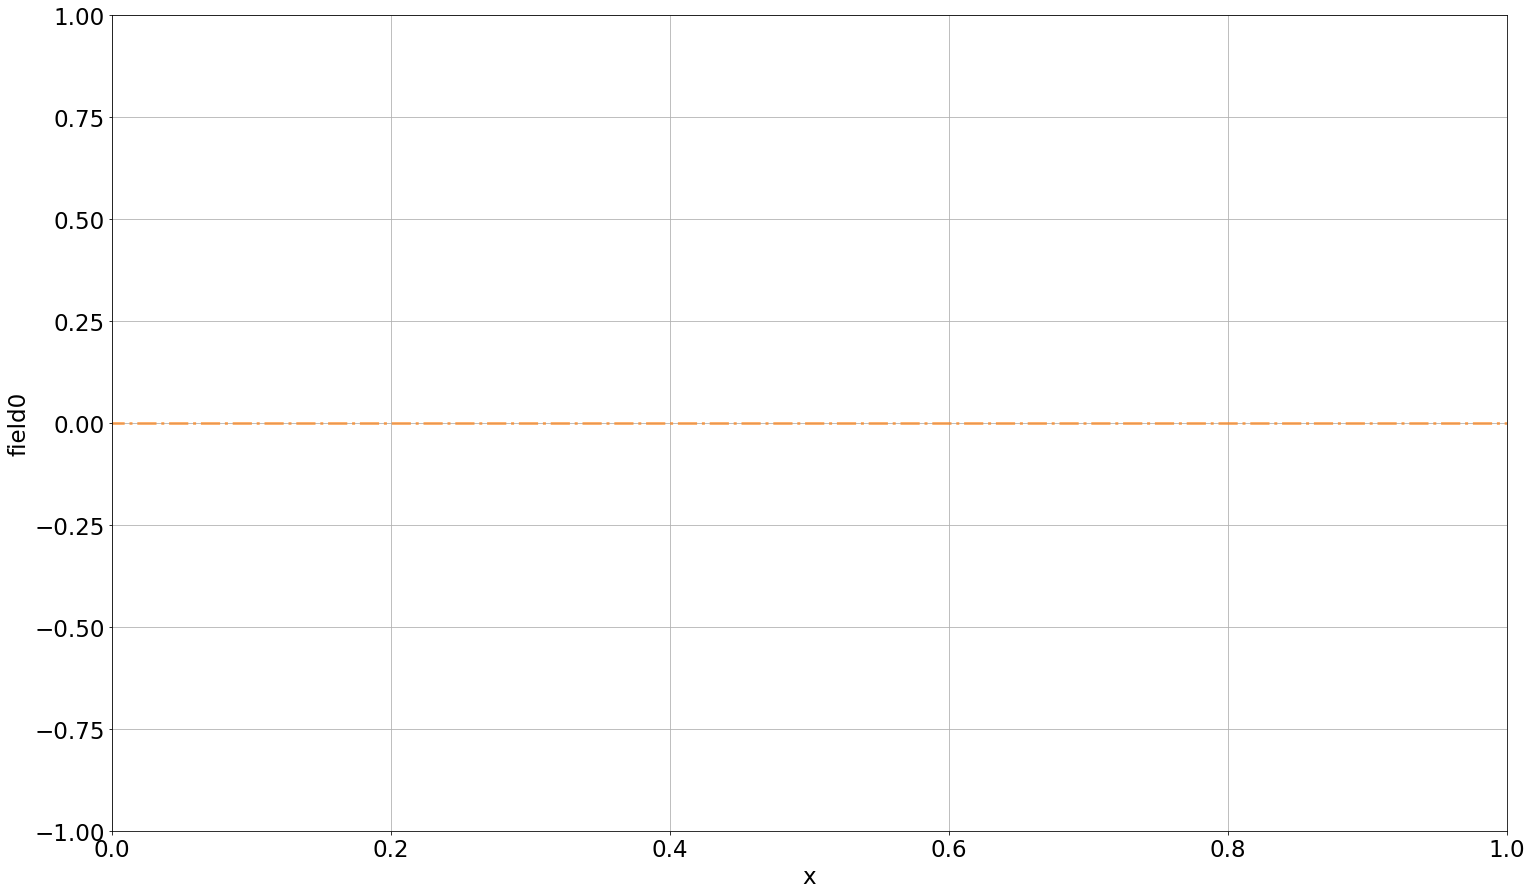

In [17]:
fields_to_print = [0]
h_ind = 2
data_name = "./data/"+model+"/data"+str(data[0])+"/fields.mp4"
fig = plt.figure()
ax1 = plt.axes(ylim=(-1,1),xlim=(0,domain_lenght))
line, = ax1.plot([], [])
plt.xlabel('x')
plt.ylabel('field0')
plotlays = [fields_to_print]
lines = []
for index in (fields_to_print):
    lobj = ax1.plot([],[],'-.',lw=3,alpha=0.6)[0]
    lines.append(lobj)

x = []
y = []
for i in (fields_to_print):
    x.append([big_DF[0][h_ind][0]['x']]),
    y.append([ big_DF[0][h_ind][0]['field0']])


def init():
    for line in lines:
        line.set_data(x,y)      
        #line.set_data([x1,x2,x3,x4,x5,x6,x7],[y1,y2,y3,y4,y5,y6,y7])
    return lines





def animate(i):
    for n,j in enumerate (fields_to_print):
        x[n] = big_DF[j][h_ind][0]['x']
        y[n] = big_DF[j][h_ind][i]['field0']
        
    

    xlist = x
    ylist = y

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=number_steps-1, interval=50, blit=True)

plt.grid()
plt.show()
anim.save(data_name)

In [ ]:
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(len(names)):
    amplitudes_vector.append(float(names[n][25:33]))
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816- amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

Text(0, 0.5, 'maximum PI overall times')

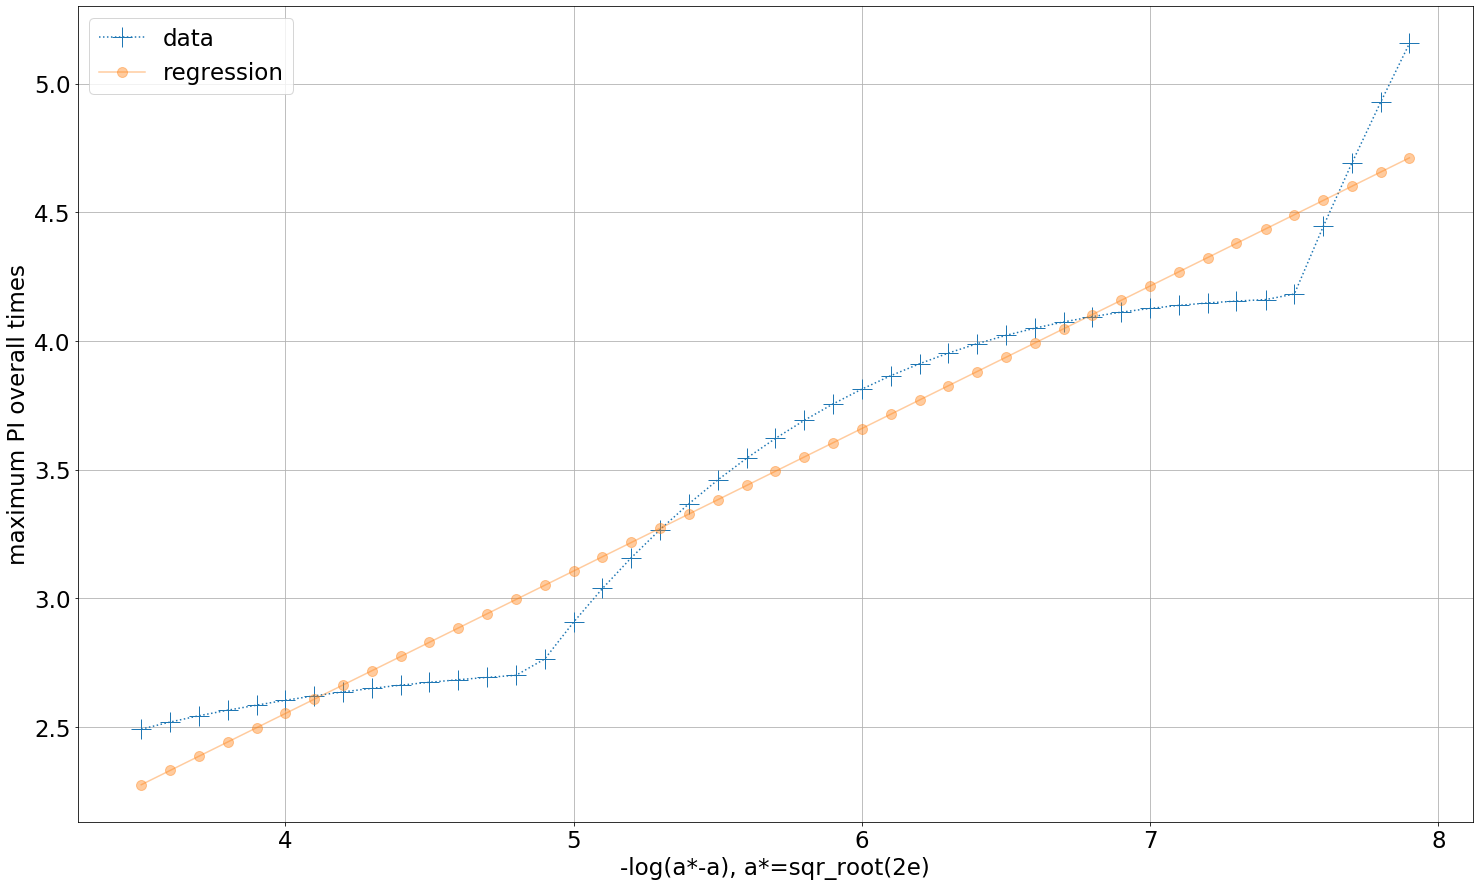

In [126]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')


In [28]:
amplitudes_vector_creator(4,7,9.326575926388497,0.2)

array([9.30826029, 9.31158035, 9.31429859, 9.31652409, 9.31834618,
       9.31983798, 9.32105936, 9.32205935, 9.32287806, 9.32354837,
       9.32409717, 9.3245465 , 9.32491437, 9.32521556, 9.32546215])

In [14]:
np.sqrt(np.e*2)*4

9.326575926388497

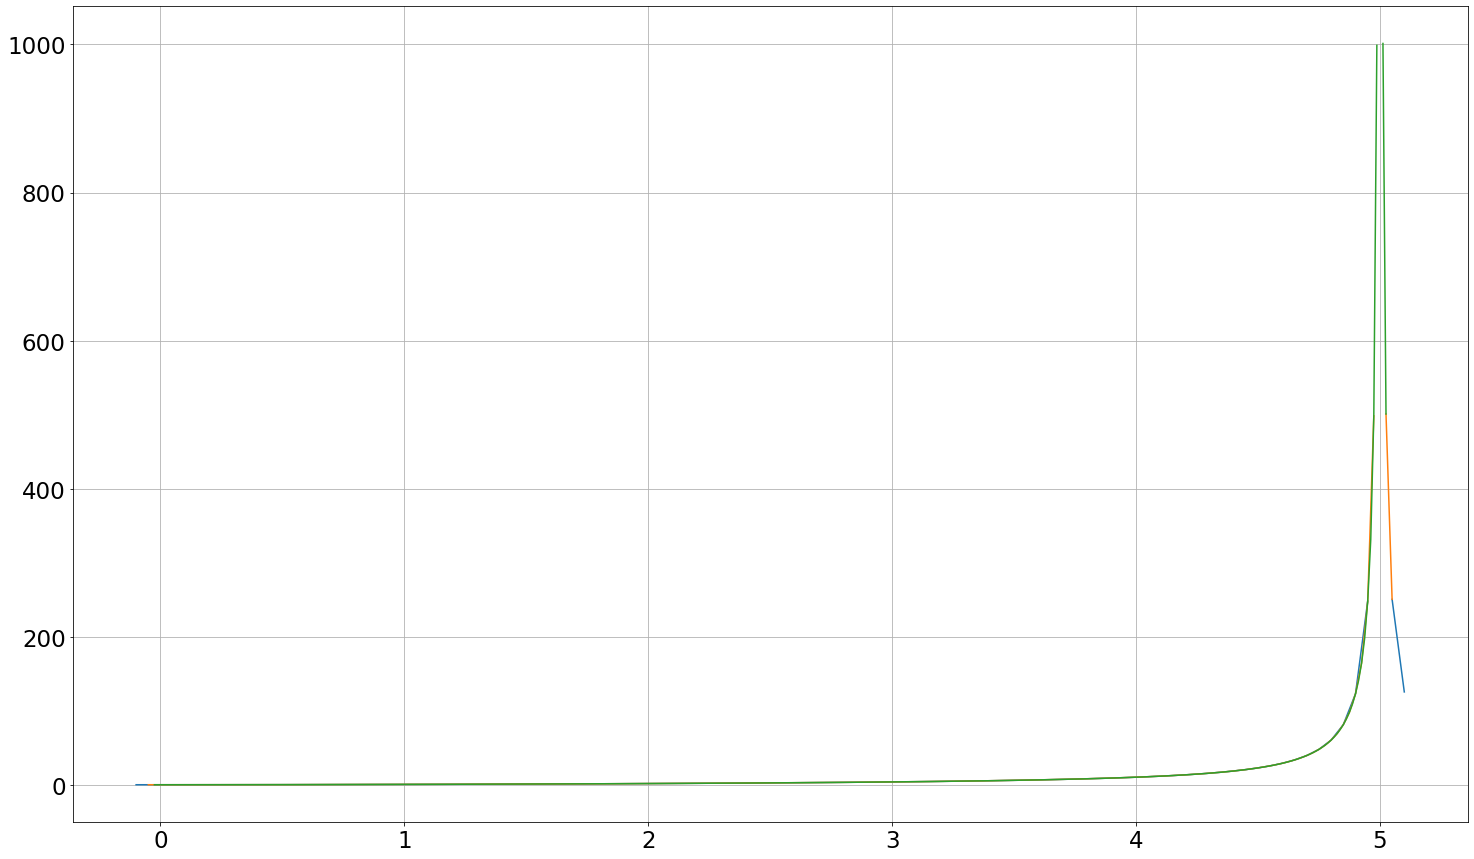

In [165]:
s = 5
for n in [0]:
    Chi = []
    for i in range(0,3): 
            r = big_DF[n][i][0]['x']
            R = r/(1-r**2/s**2)
            Chi.append(np.sqrt(1+R**2))
            plt.plot(big_DF[n][i][0]['x'],Chi[i])
plt.grid()
